# ORIE 4580/5580/5581 Assignment 3

#### Students: Adrianna Ahn (ha266)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 22, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

___
___

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).
___

### code copied from demo notebook, modified as needed

In [1]:
# Make sure we have the packages we need
import numpy as np
from scipy import stats
import math

# Configuring matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')

In [2]:
def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)


In [3]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
# Functions to visualize LCG sequence on clock (see demo notebook)
def LCG(n, m=2**31-1, a=1103515245, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x) % m

    return output

$X_{n+1}$

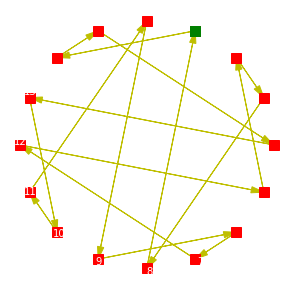

In [20]:
m = 16
a = 5
seed = 1

fig = plt.figure(figsize=(5,5))
x = LCG(n=m+1,m=m,a=a,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

$Y_{n+1}$

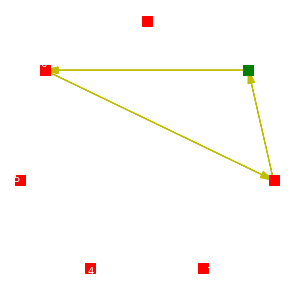

In [19]:
m = 7
a = 2
seed = 1

fig = plt.figure(figsize=(5,5))
y = LCG(n=m+1,m=m,a=a,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,y,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

___
**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.
___

In [37]:
def cLCG(n, xm, xa, x, ym, ya, y):
    """
    Generate pseudorandom sequence using a combination of linear congruential generator
    
    params:
    n : the number of pseudorandom numbers to generate
    
    xm : int, modulus value for the X LCG
    xa : int, multiplier value for the X LCG
    x : int, initial seed value of X LCG
    
    ym : int, modulus value for the Y LCG
    ya : int, multiplier value for the Y LCG
    y : int, initial seed value of Yn LCG
    
    returns:
    an np.arrray of the combined LCG sequence in range [0,1]
    """

    output = np.zeros(n)
    x_seed = x
    y_seed = y
    
    for i in range(n):
        x_n = (x_seed*xa) % xm
        y_n = (y_seed*ya) % ym
        z = (x_n + y_n) % xm
        output[i] = (z+1.0) / (16+1.0)
        
        #Update values
        x_seed = x_n
        y_seed = y_n
        
    return output

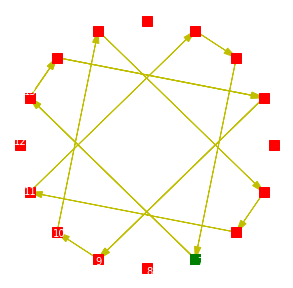

In [38]:
m = 16

x = 1
xm = 16
xa = 5

y = 1
ym = 7
ya = 2

fig = plt.figure(figsize=(5,5))
z=cLCG(n=m+1, xm = xm, xa = xa, x = x, ym = ym, ya = ya, y = y)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,z,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.


16, 3, 12 respectively

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.


$F^{-1}(y) = \begin{cases}
	-\infty & \mbox{for $y < 0$}\\
	y & \mbox{for $0 \leq y < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq y < 1$}, \\
	1 & \mbox{for $y = 1$}
	 \end{cases}$

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

## consulted chatgpt for initial code

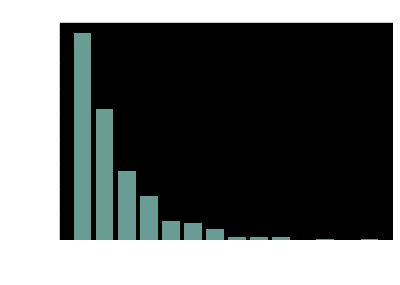

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Define the Geometric distribution parameters
p = 0.42

# Generate random samples using the inversion method
def geometric_inversion(p, size):
    samples = []
    for _ in range(size):
        u = np.random.uniform(0, 1)
        k = int(np.ceil(np.log(1 - u) / np.log(1 - p)))
        samples.append(k)
    return samples

# Generate 1000 random samples from Geometric(0.42)
sample_size = 1000
geometric_samples = geometric_inversion(p, sample_size)

# Plot the histogram of the generated samples
plt.hist(geometric_samples, bins=np.arange(1, max(geometric_samples) + 2) - 0.5, density=True, rwidth=0.8, alpha=0.75)
plt.xlabel("Value")
plt.ylabel("Probability")
plt.title(f"Geometric({p}) Distribution")
plt.show()


___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}"
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

First, find the CDF of $f(x)$. Then, find the inverse of that. For a random variable $U \sim U(0,1)$, $F^{-1}(U) = X $

$F^{-1}(y) = 
\begin{cases}

$

___
___

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

___

### Ans.


In [58]:
def f(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1)/4

In [59]:
f(1)

3.25

In [131]:
accept = []
for i in range(100):
    u1 = np.random.rand()
    u2 = np.random.rand()
    
    z1 = u1 
    z2 = 3.25*u2
    
    if z2 <= f(z1):
        accept.append(z1)

___
**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

In [122]:
np.random.geometric(1/3.25)

4

### Ans.


___
**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___


In [128]:
accept_c = []
while True:
    u1 = np.random.rand()
    u2 = np.random.rand()
    
    z1 = u1 
    z2 = 3.25*u2
    
    if z2 <= f(z1):
        accept_c.append(z1)
        
    if len(accept_c) == 2500:
        break


In [129]:
f_x = []
for i in accept_c:
    f_x.append(f(i))

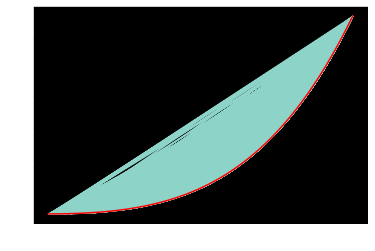

In [130]:
plt.plot(accept_c, f_x)

x = np.linspace(0, 1)

plt.plot(x, f(x), color='red')

___
___

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

___

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

First, get the CDF of the fcn, find the inverse. Generate $\mathcal{N}(0,1)$ rv, sample it into the inverse. 

### consulted chatgpt for initial code

In [132]:
def generate_laplace_samples(size):
    samples = []
    for _ in range(size):
        # Step 3: Generate a random value y from the uniform distribution [0, 1)
        y = np.random.rand()
        
        # Step 4: Use the inverse CDF to transform y into a Laplace-distributed sample
        if y < 0.5:
            x = -np.log(2 * y)
        else:
            x = np.log(2 * (1 - y))
        samples.append(x)
    return samples

# Example usage: Generate 10 Laplace-distributed samples
laplace_samples = generate_laplace_samples(10)
print("Laplace-distributed samples:", laplace_samples)

Laplace-distributed samples: [0.299769393310002, -1.0064621655067465, 1.8501739323839252, 0.4867908144647208, -0.6099416632449141, 0.29504595120643123, 2.216870020139539, -0.44309805201408464, 0.10234329466093563, -0.046402877233655326]


___
**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___

### Ans.

Average Number of Iterations: 0.313
95% Confidence Interval for Number of Iterations: (0.2729548876331035, 0.3530451123668965)


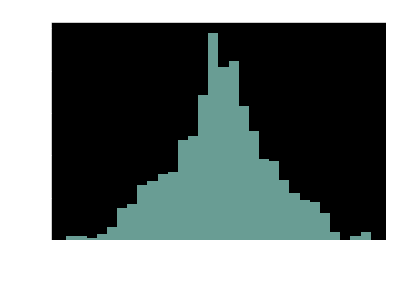

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Define the standard normal PDF f(x)
def f(x):
    return np.exp(-x**2/2) / np.sqrt(2 * np.pi)

# Define the Cauchy PDF g(x)
def g(x):
    return 1 / (np.pi * (1 + x**2))

# Calculate the constant k
k = 1 / np.sqrt(2)

# Generate samples from the standard normal distribution using acceptance-rejection
def generate_standard_normal_samples(size):
    samples = []
    iterations = []  # To store the number of iterations for each sample
    for _ in range(size):
        num_iterations = 0
        while True:
            # Step 1: Generate a random value y from the Cauchy distribution
            y = np.random.standard_cauchy()
            
            # Step 2: Generate a random number u from a uniform distribution [0, 1)
            u = np.random.rand()
            
            # Step 3: Check the acceptance condition
            if u <= f(y) / (k * g(y)):
                samples.append(y)  # Accept y as a sample from N(0, 1)
                iterations.append(num_iterations)
                break
            num_iterations += 1
    return samples, iterations

# Example usage: Generate 1000 standard normal samples and compute the expected number of iterations
sample_size = 1000
samples, iteration_counts = generate_standard_normal_samples(sample_size)

# Calculate the average number of iterations and 95% confidence interval
average_iterations = np.mean(iteration_counts)
confidence_interval = stats.norm.interval(0.95, loc=average_iterations, scale=stats.sem(iteration_counts))

print("Average Number of Iterations:", average_iterations)
print("95% Confidence Interval for Number of Iterations:", confidence_interval)

# Plot the histogram of the generated samples
plt.hist(samples, bins=30, density=True, alpha=0.75)
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Histogram of Standard Normal Samples")
plt.show()


___
**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

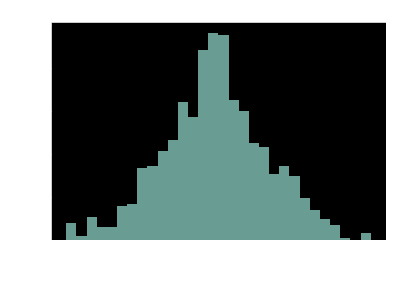

Average Number of Iterations: 0.082
95% Confidence Interval for Number of Iterations: (0.06168968623349021, 0.1023103137665098)


In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Define the standard normal PDF f(x)
def f(x):
    return np.exp(-x**2/2) / np.sqrt(2 * np.pi)

# Define the Laplace PDF g(x)
def g(x):
    return np.exp(-abs(x)) / 2

# Calculate the constant k
k = 2 * np.sqrt(1 / (2 * np.pi))

# Generate samples from the standard normal distribution using acceptance-rejection
def generate_standard_normal_samples(size):
    samples = []
    iterations = []  # To store the number of iterations for each sample
    for _ in range(size):
        num_iterations = 0
        while True:
            # Step 1: Generate a random value y from the Laplace distribution
            y = np.random.laplace(0, 1)
            
            # Step 2: Generate a random number u from a uniform distribution [0, 1)
            u = np.random.rand()
            
            # Step 3: Check the acceptance condition
            if u <= f(y) / (k * g(y)):
                samples.append(y)  # Accept y as a sample from N(0, 1)
                iterations.append(num_iterations)
                break
            num_iterations += 1
    return samples, iterations

# Generate 1000 standard normal samples and obtain the number of iterations for each
sample_size = 1000
samples, iteration_counts = generate_standard_normal_samples(sample_size)

# Plot the histogram of the generated samples
plt.hist(samples, bins=30, density=True, alpha=0.75)
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Histogram of Standard Normal Samples")
plt.show()

# Calculate the average number of iterations and 95% confidence interval
average_iterations = np.mean(iteration_counts)
confidence_interval = stats.norm.interval(0.95, loc=average_iterations, scale=stats.sem(iteration_counts))

print("Average Number of Iterations:", average_iterations)
print("95% Confidence Interval for Number of Iterations:", confidence_interval)


___
**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.
___

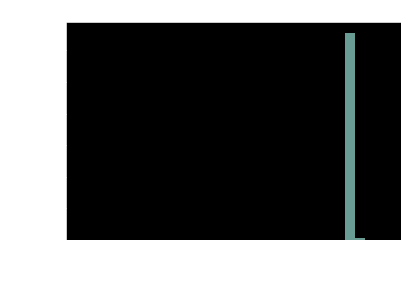

In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Cauchy-distributed samples using inversion method
def generate_cauchy_samples(size):
    samples = []
    for _ in range(size):
        # Step 3: Generate a random value y from the uniform distribution [0, 1)
        y = np.random.rand()
        
        # Step 4: Use the inverse CDF to transform y into a Cauchy-distributed sample
        x = np.tan(np.pi * (y - 0.5))
        samples.append(x)
    return samples

# Example usage: Generate 1000 Cauchy-distributed samples
sample_size = 1000
cauchy_samples = generate_cauchy_samples(sample_size)

# Plot the histogram of the generated samples
plt.hist(cauchy_samples, bins=30, density=True, alpha=0.75)
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Histogram of Cauchy-Distributed Samples")
plt.show()


___
**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

### Ans.

In [136]:
import numpy as np

# Define the standard normal PDF f(x)
def f(x):
    return np.exp(-x**2/2) / np.sqrt(2 * np.pi)

# Define the Cauchy PDF g(x)
def g(x):
    return 1 / (np.pi * (1 + x**2))

# Calculate the constant k
k = np.sqrt(2) / np.sqrt(np.pi)

# Generate samples from the standard normal distribution using acceptance-rejection
def generate_standard_normal_samples(size):
    samples = []
    iterations = []  # To store the number of iterations for each sample
    for _ in range(size):
        num_iterations = 0
        while True:
            # Step 1: Generate a random value y from the Cauchy distribution
            y = np.random.standard_cauchy()
            
            # Step 2: Generate a random number u from a uniform distribution [0, 1)
            u = np.random.rand()
            
            # Step 3: Check the acceptance condition
            if u <= f(y) / (k * g(y)):
                samples.append(y)  # Accept y as a sample from N(0, 1)
                iterations.append(num_iterations)
                break
            num_iterations += 1
    return samples, iterations

# Example usage: Generate 1000 standard normal samples and compute the expected number of iterations
sample_size = 1000
samples, iteration_counts = generate_standard_normal_samples(sample_size)

# Calculate the average number of iterations and 95% confidence interval
average_iterations = np.mean(iteration_counts)
confidence_interval = stats.norm.interval(0.95, loc=average_iterations, scale=stats.sem(iteration_counts))

print("Average Number of Iterations:", average_iterations)
print("95% Confidence Interval for Number of Iterations:", confidence_interval)


Average Number of Iterations: 0.315
95% Confidence Interval for Number of Iterations: (0.2757921378228869, 0.3542078621771131)
